# Assignment 5 - Time Series Analysis
## Data Science Tools I
### Professor: Don Dalton

---

### Student: Krista Miller

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Question 1 - Importing the Datasets

## Part (a)
### 8 points

Download the .csv files (CurrentPrices, EmploymentRate, ProductionVolume, and Sales) linked on Canvas on the assignment page and place them in a local repository alongside your notebook file. (If on Google Colab, upload the files to the colab.) Use Pandas to read each .csv file into its own variable.

After inspecting the first few rows of each data frame, clean up each data frame by converting the `Date` column to Datetime objects, then setting the index of the data frame to be the `Date` values to convert the data frame into a series.

Plot each dataset with an appropriate title, either individually in separate code cells or all together in a single plot using subplots.

In [2]:
#load the files:
current_prices = pd.read_csv('CurrentPrices.csv')
employment_rate = pd.read_csv('EmploymentRate.csv')
production_volume = pd.read_csv('ProductionVolume.csv')
sales = pd.read_csv('Sales.csv')

#inspect first rows of each dataframe:
display(current_prices.head(5))
display(employment_rate.head(5))
display(production_volume.head(5))
display(sales.head(5))

,Date,Current_price
0,1997Q1,149
1,1997Q2,151
2,1997Q3,154
3,1997Q4,155
4,1998Q1,157


,Date,Empl_Rate
0,1971 FEB,72.2
1,1971 MAR,72.1
2,1971 APR,72.0
3,1971 MAY,72.0
4,1971 JUN,71.9


,Date,IOP
0,1995 JAN,89.9
1,1995 FEB,93.3
2,1995 MAR,108.2
3,1995 APR,91.0
4,1995 MAY,101.2


,Date,Sales
0,2007 JAN,240
1,2007 FEB,235
2,2007 MAR,232
3,2007 APR,178
4,2007 MAY,180


In [3]:
#converting the Date column to Datetime objects:
current_prices['Date'] = pd.to_datetime(current_prices['Date'])
employment_rate['Date'] = pd.to_datetime(employment_rate['Date'])
production_volume['Date'] = pd.to_datetime(production_volume['Date'])
sales['Date'] = pd.to_datetime(sales['Date'])

#setting the index of the data frame to be the Date values to convert the data frame into a series.
current_prices.set_index('Date', inplace=True)
employment_rate.set_index('Date', inplace=True)
production_volume.set_index('Date', inplace=True)
sales.set_index('Date', inplace=True)

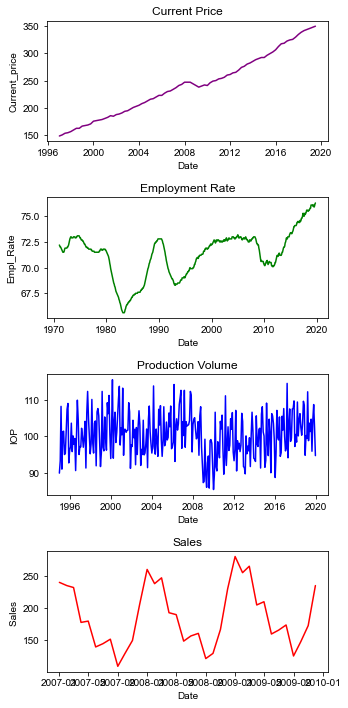

In [4]:
#Plot each dataset with an appropriate title:
fig, ax = plt.subplots(4, figsize=(5, 10))

sns.set(style="ticks")

g1 = sns.lineplot(x="Date", y="Current_price", color="purple", data=current_prices, ax=ax[0]).set_title("Current Price")
g2 = sns.lineplot(x="Date", y="Empl_Rate", color= "green", data=employment_rate, ax=ax[1]).set_title("Employment Rate")
g3 = sns.lineplot(x="Date", y="IOP", color= "blue", data=production_volume, ax=ax[2]).set_title("Production Volume")
g4 = sns.lineplot(x="Date", y="Sales ", color= "red", data=sales, ax=ax[3]).set_title("Sales")

plt.tight_layout()

## Part (b)
### 4 points

Based on the plots you created in part (a), determine which pattern each dataset falls into and suggest a corresponding forecasting technique to match each pattern. For pattern and forecasting technique, limit your choice to the following options:

> **Patterns:** Horizontal, Trend, Seasonal without Trend, Seasonal with Trend

> **Forecasting Technique:** Naive Forecasting, Moving Average Smoothing, Exponential Smoothing, Regression Analysis, Regression Analysis with Dummy Variables

To answer this question, EDIT THIS TEXT CELL by replacing the x's below with your answers (as opposed to typing in a code cell).

Dataset | Pattern | Forecasting Technique
--- | --- | ---
CurrentPrice | Trend | Regression Analysis
EmploymentRate | Horizontal | Moving Average Smoothing
ProductionVolume | Horizontal | Moving Average Smoothing
Sales | Seasonal without Trend | Regression Analysis with Dummy Variables

# Question 2 - Examining the Data

For this question and the subsequent ones, we will use the **ProductionVolume** dataset as the time series of interest.

## Part (a)
### 4 points

To start, check the stationarity of the data by plotting the rolling mean and standard deviation alongside the data itself. 

Based on your plot, is the data stationary? Provide reasons with your answers. Include your answer either as a text cell or in-line comment.

<AxesSubplot:xlabel='Date', ylabel='IOP'>

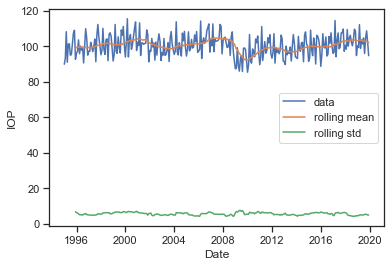

In [5]:
# This dataset is in months, so a window of size 12 is one year
rolling_mean = production_volume.rolling(window=12).mean()
rolling_std = production_volume.rolling(window=12).std()
rolling_mean.head(14)

sns.lineplot(x=production_volume.index, y=production_volume['IOP'], label='data')
sns.lineplot(x=rolling_mean.index, y=rolling_mean['IOP'], label='rolling mean')
sns.lineplot(x=rolling_std.index, y=rolling_std['IOP'], label='rolling std')

Based on the plot, the data appears stationary, because it fulfills the requirements for a stationary time series:
-the mean is constant at all time points (approximately 100 IOP)
-the variance is constant at all time points (approximately 6 IOP)
-there does not appear to be seasonality or trends

## Part (b)
### 4 points

Use `seasonal_decompose` to observe the trend, seasonality, and residuals for the data by plotting all plots alongside one another.

Based on your plots, is there a cyclical pattern in the data? Provide reasons with your answers. Include your answer either as a text cell or in-line comment.

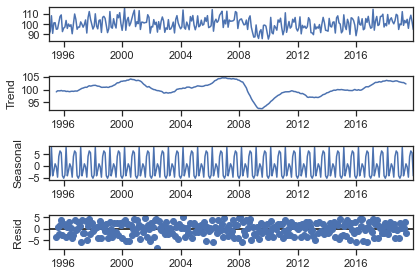

In [6]:
from statsmodels.tsa.seasonal import seasonal_decompose

seasonal_decompose(production_volume).plot();

Yes, there is a cyclical pattern in the data.  There is no linear trend, there is a seasonal component, and the residuals are like white noise since the variance (amplitude) does not change over time

## Part (c)
### 4 points

To further confirm stationarity or non-stationarity, perform the Dickey-Fuller Test on the data. You may use the `run_adftest` method provided in lecture.

Based on the result, is any differencing needed? If so, first-order difference the data and re-run the Dickey-Fuller Test to see if the results change.

In [7]:
from statsmodels.tsa.stattools import adfuller

def run_adftest(s):
    print("Dickey-Fuller Test")
    adftest = adfuller(s, autolag='AIC')
    print(f"Test Statistic: {adftest[0]}")
    print(f"p-value: {adftest[1]}")
    print("Critical Values:")
    for k, v in adftest[4].items():
        print("\t{}: {} - The data is{} stationary with {}% confidence".format(k, v, " not" if v<adftest[0] else "", 100-int(k[:-1])))

run_adftest(production_volume['IOP'])


Dickey-Fuller Test
Test Statistic: -4.075364429398538
p-value: 0.0010634304413763525
Critical Values:
	1%: -3.4535050041524245 - The data is stationary with 99% confidence
	5%: -2.8717352599720294 - The data is stationary with 95% confidence
	10%: -2.5722024776854417 - The data is stationary with 90% confidence


Based on the result, no differencing is needed.  A p-value is <0.05 indicates that we can reject the null hypothesis that the time series is not stationary.  The p-value of 0.001 is strong evidence that the series is stationary.  

# Question 3 - Model Estimation

## Part (a)
### 4 points

Plot the auto-correlation function (ACF) to get an indication of what type of ARIMA model may apply to this dataset. Refer to the table below to determine which model is best.

Provide your model choice either in a text cell below or as comments in the code cell alongside your code for the ACF plot. 

Shape | Indicated Model
--- | ---
Exponential, decay to zero | AR - Use PACF plot to identify order
Alternating positive and negative, decaying to zero | AR - Use PACF plot to identify order
One or more spikes, rest are essentially zero  | MA - Order identified by where plot becomes zero
Decay, starting after a few lags | ARMA
All zero or close to zero | Data is essentially random
High values at fixed intervals | Include seasonal autoregressive term / difference
No decay to zero | The series is not stationary

<BarContainer object of 41 artists>

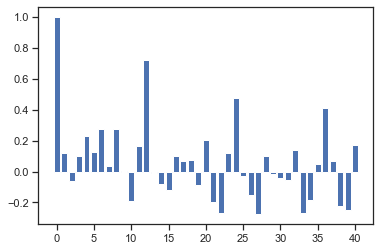

In [8]:
from statsmodels.tsa.stattools import acf

# The use of 40 for nlags is not significant, we just want to see a good amount
autocorr = acf(production_volume, nlags=40)
plt.bar(range(len(autocorr)), autocorr)

Shape Alternating positive and negative, decaying to zero
Model choice: AR - Use PACF plot to identify order

## Part (b)
### 5 points

Plot the partial auto-correlation function (PACF). Based on the PACF plot and ACF plot, determine what values are likely best for `p` and `q`. 

Question 2 Part (c) should have determined the best value for `d`. Fill in your answer for `p`, `d`, and `q` in this text cell:

`p=` 5;  This is the point just before the partial autocorrelations goes below 0 or into the highlighted region on the PACF plot.

`d=` 0; (reason: Based on the result, no differencing is needed.  A p-value is <0.05 indicates that we can reject the null hypothesis that the time series is not stationary.  The p-value of 0.001 is strong evidence that the series is stationary.  )

`q=` 12; This is the point just before the autocorrelation plot goes below 0 or into the highlighted region on the ACF plot. 

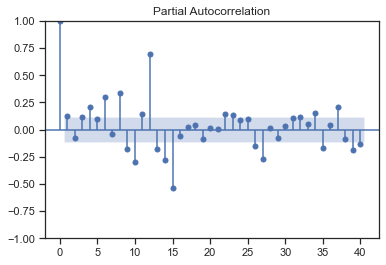

In [10]:
from statsmodels.graphics.tsaplots import plot_pacf
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
plot_pacf(production_volume, lags=40);

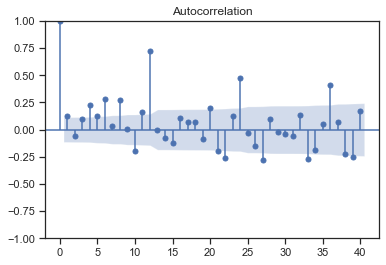

In [11]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(production_volume, lags=40);

# Question 4 - Model Fitting



## Part (a)
### 6 points

Given your determination of `p`, `d`, and `q`, fit an ARIMA model with those parameters using the entire time series as training data. Get the predicted values from the model (calling `predict` with `d` as the start value and including `typ='levels'` if `d>0`) and compute the mean squared error (MSE) between the predictions and the actual values.

In addition to printing the resulting MSE, plot the predictions alongside the actual values.

C:\Users\bisho\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\bisho\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\bisho\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\bisho\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\bisho\AppData\Roaming\

MSE:  16.5501572836928


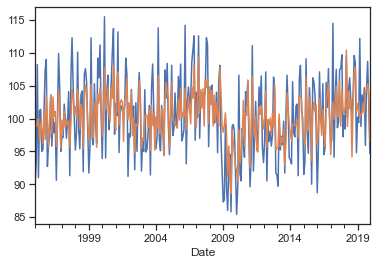

In [17]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

p = 5
d = 0
q = 12

train_data = production_volume['IOP'] # Diff will be applied by ARIMA

# Train the model and get predictions
model = ARIMA(train_data, order=(p, d, q)).fit()
predictions = model.predict(start=d, typ='levels') # 'levels' keeps original scaling when differencing is used!

# Compute error
mse = mean_squared_error(train_data.iloc[d:], predictions)

# Plot results
scaled_predictions = pd.Series(predictions, copy=True) # convert to Series

production_volume.IOP.plot()
scaled_predictions.plot()
print("MSE: ", mse)

## Part (b)
### 4 points

To further assess the accuracy of the model, plot the residual errors of the model both as a **histogram** and as a **scatterplot**.

Based on these plots, are the residuals normally distributed? Are the mean and variance constant over time? Provide reasons with your answers. Include your answer either as a text cell or in-line comment.

                0
count  300.000000
mean     0.033499
std      4.074848
min    -11.375893
25%     -2.737650
50%     -0.209721
75%      2.740344
max     12.136923


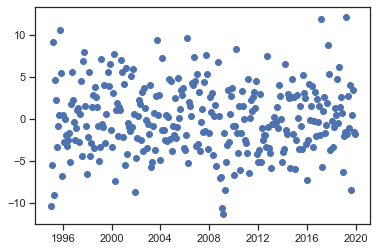

In [14]:
from matplotlib import pyplot
residuals = pd.DataFrame(model.resid)
plt.scatter(x= scaled_predictions.index.values, y=model.resid)

# summary stats of residuals
print(residuals.describe())

#The residual errors appear to fluctuate around a mean of zero and have a uniform variance.

(array([ 4.,  8., 25., 59., 68., 61., 43., 20.,  9.,  3.]),
 array([-11.37589292,  -9.02461131,  -6.6733297 ,  -4.32204809,
         -1.97076648,   0.38051513,   2.73179674,   5.08307835,
          7.43435996,   9.78564157,  12.13692318]),
 <BarContainer object of 10 artists>)

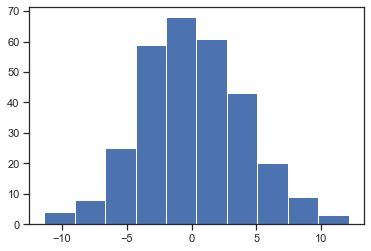

In [15]:
plt.hist(model.resid)
#The density plot suggest normal distribution
#with mean zero.

## Part (c)
### 2 points

Since the estimated parameters are not guaranteed to provide the best results, try fitting an ARIMA model with new parameters (different value for at least one of `p`, `d`, and `q`). Based on MSE, is your new model better or worse than your original in part (a)?

C:\Users\bisho\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\bisho\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\bisho\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\bisho\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\bisho\AppData\Roaming\

MSE:  14.265678434560813


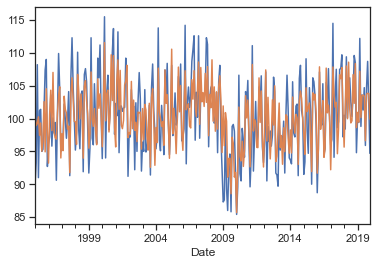

In [19]:
# Train the model and get predictions
model2 = ARIMA(train_data, order=(7, 0, 12)).fit()
predictions2 = model2.predict(start=d, typ='levels') # 'levels' keeps original scaling when differencing is used!

# Compute error
mse = mean_squared_error(train_data.iloc[d:], predictions2)

# Plot results
scaled_predictions2 = pd.Series(predictions2, copy=True) # convert to Series

production_volume.IOP.plot()
scaled_predictions2.plot()
print("MSE: ", mse)

#This MSE is lower than the previous model, so the new model is better than the original in part (a). 

# Question 5 - Forecasting

For this question, use whichever model from question 4 ended up being the better one based on MSE.

## Part (a)
### 2 points

Use your model to forecast the next value and print the result.

In [20]:
model2.forecast(steps=1)

2020-01-01    101.505272
Freq: MS, dtype: float64

## Part (b)
### 2 points

Use `plot_predict` to plot the actual data, the model's predictions for the actual data, and the confidence interval and forecasts for the next 50 steps.

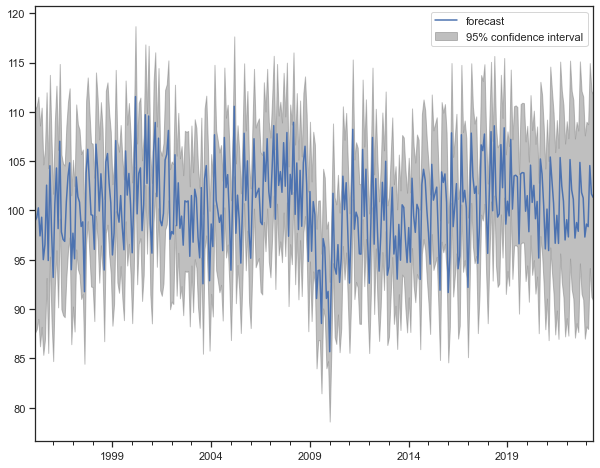

In [21]:
from statsmodels.graphics.tsaplots import plot_predict

fig, ax = plt.subplots(figsize=(10,8))
fig = plot_predict(model2, start=1, end=len(production_volume)+40, ax=ax)
